Training data shape: (60000, 28, 28)
Training labels shape: (60000,)


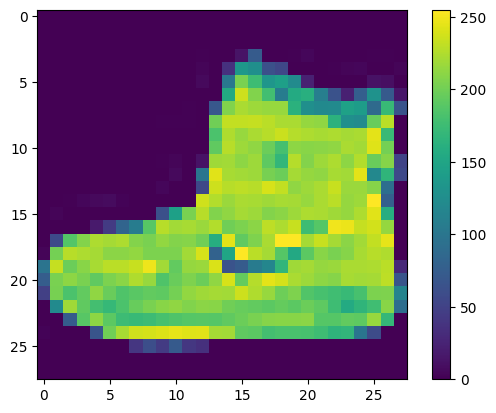

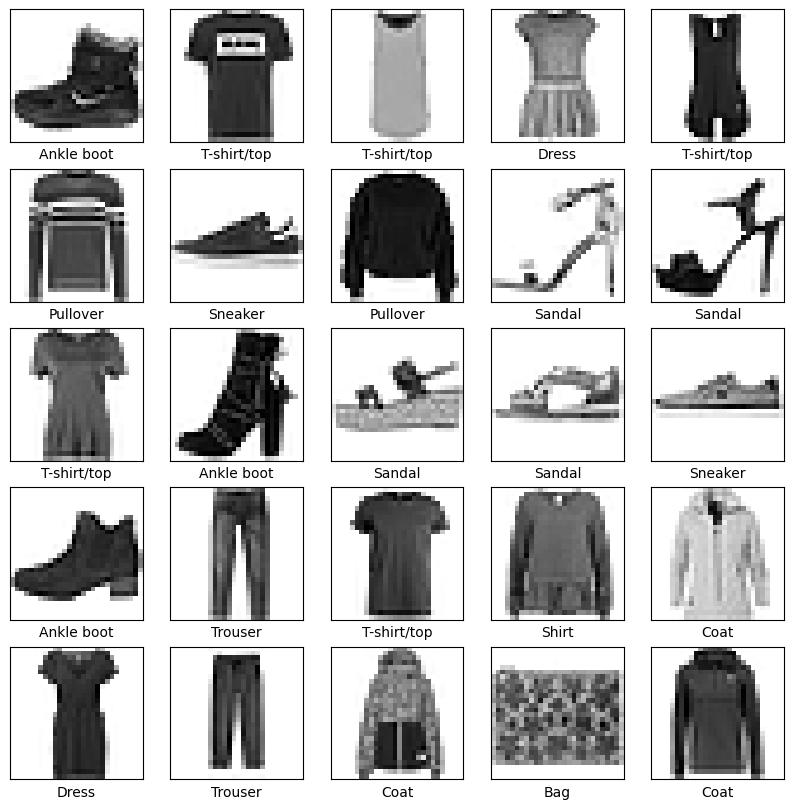

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6743 - loss: 10.0078
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7240 - loss: 0.7963
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7714 - loss: 0.6307
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7995 - loss: 0.5572
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8227 - loss: 0.5134
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8311 - loss: 0.4949
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8346 - loss: 0.4810
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8388 - loss: 0.4730
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8425 - loss: 0.4672
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8444 - loss: 0.4628
313/313 - 1s - 5ms/step - accuracy: 0.8227 - loss: 0.5320
Test acuracy: 0.822700023651123
313/313 ━━━━━━━━━━━━━

In [14]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

# Cargar el dataset de Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Hay 60000 imágenes en el training dataset
print(f"Training data shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")


#Visualizar imagen
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


# Visualizamos algunas imágenes
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


# creamos el modelo
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation= "softmax")
])

#complilamos el modelos
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Entrenamos el modelo 
model.fit(train_images,train_labels, epochs= 10)

# Evaluamos exactitud:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test acuracy:" , test_acc)

predictions= model.predict(test_images)

print(predictions[0])

# Nos quedamos con la mas elevada
print(np.argmax(predictions[0]))

# Moestremos de forma grafica todo el conjunto de las predicciones de las 10 clases 

def plot_image (i, predictinos_array, true_label, img): 
    predictinos_array, true_label, img = predictinos_array, true_label[i], img[i]
    plt.grid(False)
    plt.yticks([])
    plt.xticks([])

    plt.imshow (img, cmap=plt.cm.binary)

    predicted_label= np.argmax(predictinos_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"
    plt.xlabel("{}, {:2.0f}%({})".format(class_names[predicted_label],
                                                     100*np.max(predictinos_array),
                                                     class_names[true_label]),
                                                     color=color)
def plot_value_array(i, predictinos_array, true_label):
    predictinos_array, true_label= predictinos_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot= plt.bar(range(10), predictinos_array, color="#777777")
    plt.ylim([0,1])
    predicted_label=np.argmax(predictinos_array)

    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")
                                                     


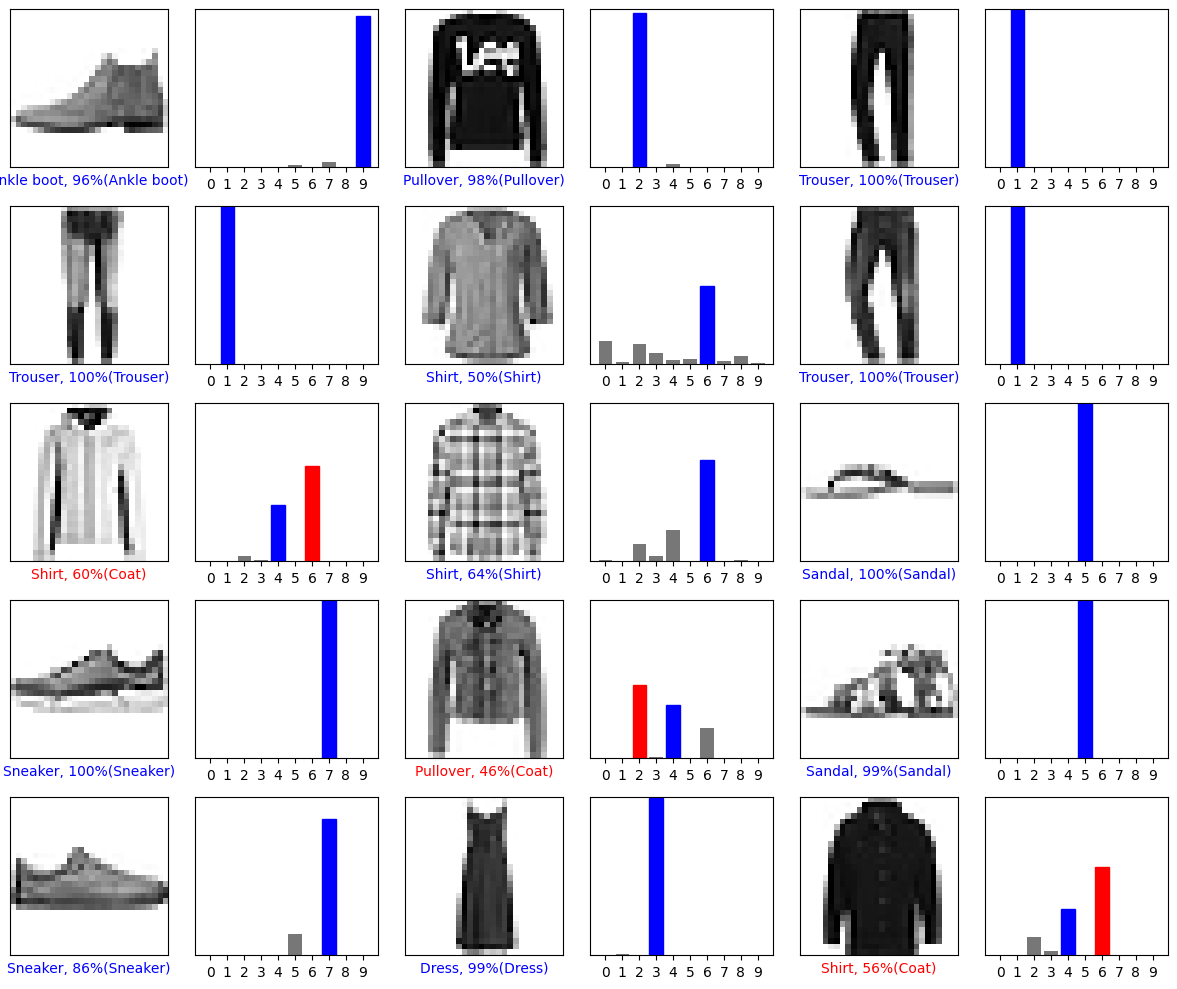

In [15]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure( figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()